# Dataset

In [56]:
import numpy as np
import pandas as pd

In [57]:
# Download data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 

# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 
  

In [58]:
X.describe()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [59]:
non_user_values = ['CL0', 'CL1']
user_values = ['CL2', 'CL3', 'CL4' 'CL5', 'CL6']

y.loc[:, 'mushrooms'] = y['mushrooms'].map(lambda value: 0 if value in non_user_values else 1)

In [60]:
y_mushroom = y['mushrooms']

In [61]:
y_mushroom.value_counts()

mushrooms
0    1191
1     694
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(X, y_mushroom, shuffle=True, stratify=y_mushroom, random_state=42, test_size=0.33)

In [63]:
y_mushroom_train.value_counts()

mushrooms
0    797
1    465
Name: count, dtype: int64

In [64]:
y_mushroom_test.value_counts()

mushrooms
0    394
1    229
Name: count, dtype: int64

## Load from local

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_dataset(f_csv='./datasets/mushroom.csv', test_size=0.33, random_state=42):
    """ArithmeticError
    Params:
        f_csv: str,
        test_size: float,
        random_state: int,
    Returns:
        X_train,
        X_test,
        y_train,
        y_test
    """
    dataset = pd.read_csv(f_csv)
    features = dataset.iloc[:, :-1]
    labels = dataset.iloc[:, -1]
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, 
                                                        random_state=random_state, stratify=labels)
    return X_train, X_test, y_train, y_test

In [2]:
mushroom_csv = './datasets/mushroom.csv'
test_size = 0.33
random_state = 42
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = load_dataset(mushroom_csv, test_size=test_size, random_state=random_state)

In [3]:
y_mushroom_train.value_counts()

mushrooms
0    797
1    465
Name: count, dtype: int64

In [4]:
y_mushroom_test.value_counts()

mushrooms
0    394
1    229
Name: count, dtype: int64

# Baseline GB

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
def finetune_best_estimator(model, X_train, y_train, param_grid, cv=5):
    model_name = model.__class__.__name__
    print(f"Running GridSearchCV for {model_name}...")
    f1 = make_scorer(f1_score , average='micro')
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=f1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Print the best parameters for each classifier
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best f1 score for {model_name}: {grid_search.best_score_}")
    # Get the best model
    return grid_search.best_estimator_, grid_search.best_params_

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameter tuning
param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10],
            'subsample': [0.8, 1.0],
            'max_features': ['sqrt', 'log2', None]
        }
cv = 5
# Gradient Boosting
gb = GradientBoostingClassifier()
# Get the best model
best_gb, best_gb_params = finetune_best_estimator(gb, X_mushroom_train, y_mushroom_train, param_grid, cv=cv)

Running GridSearchCV for GradientBoostingClassifier...


Best parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200, 'subsample': 1.0}
Best f1 score for GradientBoostingClassifier: 0.791636865549909


In [ ]:
import joblib  # Use joblib for saving models efficiently
# save best model
joblib.dump(best_gb, f'models/gradient_boosting_mushroom.pt')

In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrices(models, X_test, y_test, 
                            f_out='figures/baseline/confusion_matrices.png',
                            labels = ['Non-User', 'User']):
    """To plot confusion matrices for multiple models.
    
    Args:
        models (dict): A dictionary with model names as keys and model instances as values.
        X_test (ndarray): The test features.
        y_test (ndarray): The true labels for the test set.
    Returns:
        confusion_matrices: dict
        predictions: dict
    """
    num_models = len(models)
    num_cols = 3  # Number of columns for the subplots
    num_raws = (num_models + num_cols - 1) // num_cols  # Calculate the number of rows needed
    labels = ['Non-User', 'User']

    fig, axes = plt.subplots(num_raws, num_cols, figsize=(5 * num_cols, 4 * num_raws))  # Set up subplots
    axes = axes.ravel()  # Flatten the axes array for easy indexing
    confusion_matrices = {}
    predictions = {}
    for i, (name, model) in enumerate(models.items()):
        # Get predictions for the current model
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
        predictions[name] = y_pred
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm
        # Plot confusion matrix using Seaborn heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                    xticklabels=labels, yticklabels=labels)
        axes[i].set_title(f"Confusion Matrix - {name}")
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    # Hide any unused subplots
    for j in range(i + 1, num_raws * num_cols):
        fig.delaxes(axes[j])

    # Adjust layout for better visibility
    plt.tight_layout()
    plt.savefig(f_out)
    plt.show()
    return confusion_matrices, predictions

def plot_ROC(models, X_test, y_test, title='ROC Curves for Magic Mushroom User Classification', f_out='figures/baseline/ROC.png'):
    # Plot ROC Curves
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random guessing line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.savefig(f_out)
    plt.show()

def evaluation(models,
               X_test, y_test,
               roc_title='ROC Curves for Mushroom User Classification',
               f_cm='figures/baseline/confusion_matrices.png',
                f_roc= 'figures/baseline/ROC.png'):
    confusion_matrices, predictions = plot_confusion_matrices(models, X_test, y_test, f_out=f_cm)
    print(confusion_matrices)
    best_models=[]
    worst_models=[]
    best_acc = float('-inf')
    worst_acc = float('inf')
    # Calculate precision and recall for each model
    for model_name, y_pred in predictions.items():
        y_prob = models[model_name].predict_proba(X_test)[:, 1]  # Use predicted probabilities
        precision = precision_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob) # Use predicted probabilities
        if accuracy>best_acc:
            best_acc=accuracy
            best_models = [model_name]
        elif accuracy==best_acc:
            best_models.append(model_name)
        if accuracy<worst_acc:
            worst_acc=accuracy
            worst_models = [model_name]
        elif accuracy==worst_acc:
            worst_models.append(model_name)
        print(f"Model: {model_name}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}, f1: {f1score}, auc: {auc}")
    print(f"Best acc: {best_acc}; Best models: {best_models}")
    print(f"Worst acc: {worst_acc}; Worst models: {worst_models}")
    plot_ROC(models, X_test, y_test, title=roc_title, f_out=f_roc)


In [8]:
import joblib  # Use joblib for saving models efficiently
# save best model
best_gb = joblib.load(f'models/gradient_boosting_mushroom.pt')

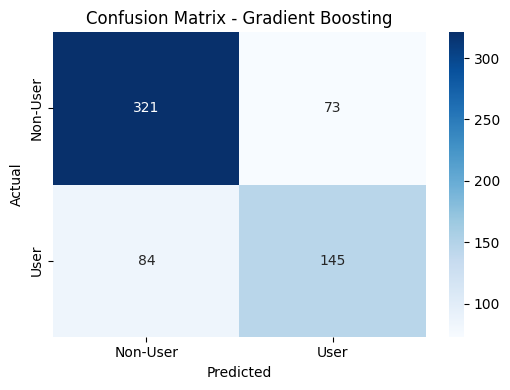

{'Gradient Boosting': array([[321,  73],
       [ 84, 145]])}
Model: Gradient Boosting, Precision: 0.6651376146788991, Recall: 0.6331877729257642, Accuracy: 0.7479935794542536, f1: 0.6487695749440716, auc: 0.8070622658657151
Best acc: 0.7479935794542536; Best models: ['Gradient Boosting']
Worst acc: 0.7479935794542536; Worst models: ['Gradient Boosting']


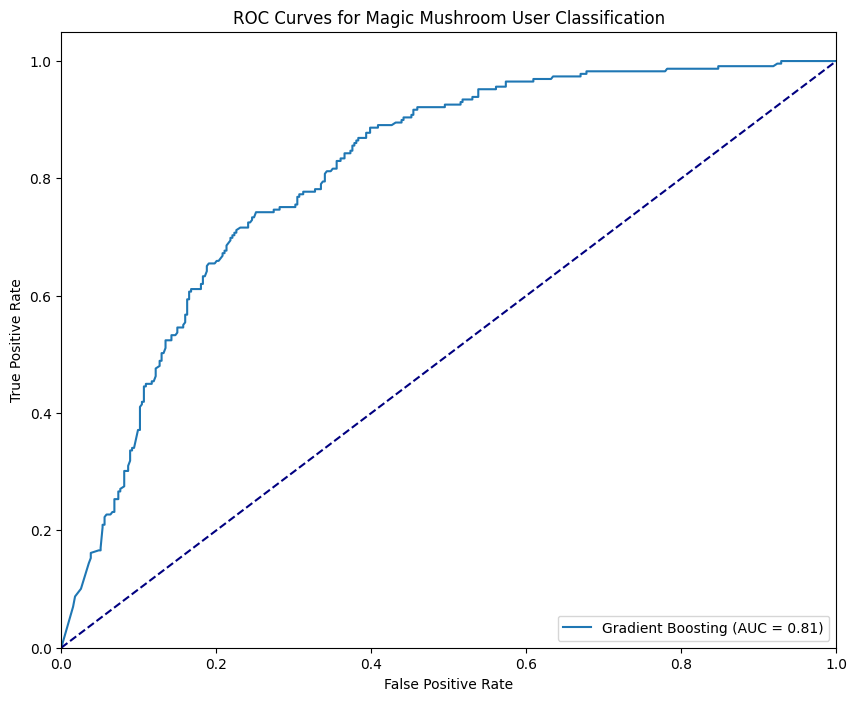

In [11]:
roc_title='ROC Curves for Magic Mushroom User Classification'
f_cm='figures/baseline/confusion_matrices.png'
f_roc='figures/baseline/ROC.png'
models = {
        'Gradient Boosting': best_gb,
}
evaluation(models, X_mushroom_test, y_mushroom_test,
           roc_title=roc_title,
           f_cm=f_cm, f_roc=f_roc)

# SSL

## Self-training
We use SelfTrainingClassifier from scikit-learn with a logistic regression base classifier.
```python
# Base classifier for self-training
base_classifier = LogisticRegression(max_iter=1000, random_state=42)
self_training_model = SelfTrainingClassifier(base_classifier)
```

## co-training

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
import numpy as np

class CoTrainingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator1, estimator2, n_iter=10, p=1, n=1, 
                 view1_features=None, view2_features=None):
        self.estimator1 = clone(estimator1)
        self.estimator2 = clone(estimator2)
        self.n_iter = n_iter
        self.p = p  # Number of positive samples to add each iteration
        self.n = n  # Number of negative samples to add each iteration
        self.view1_features = view1_features
        self.view2_features = view2_features

    def fit(self, X_labeled, y_labeled, X_unlabeled):
        # Initialize labeled data for each estimator
        L1_X = X_labeled.copy()
        L1_y = y_labeled.copy()
        L2_X = X_labeled.copy()
        L2_y = y_labeled.copy()
        U_X = X_unlabeled.copy()

        # Initialize feature views
        if self.view1_features is not None:
            L1_X_view = L1_X[:, self.view1_features]
        else:
            L1_X_view = L1_X

        if self.view2_features is not None:
            L2_X_view = L2_X[:, self.view2_features]
        else:
            L2_X_view = L2_X

        U_index = np.arange(len(U_X))

        for i in range(self.n_iter):
            # Extract features for estimator1
            if self.view1_features is not None:
                U_X_view1 = U_X[:, self.view1_features]
            else:
                U_X_view1 = U_X
            
            # Train estimator1
            self.estimator1.fit(L1_X_view, L1_y)
            # Predict on U
            probs1 = self.estimator1.predict_proba(U_X_view1)
            # Find most confident positive and negative predictions
            pos_confidence1 = probs1[:, 1]
            neg_confidence1 = probs1[:, 0]
            pos_indices = np.argsort(-pos_confidence1)
            neg_indices = np.argsort(-neg_confidence1)
            # Select top p positive and n negative samples
            pos_samples1 = min(self.p, len(pos_indices))
            neg_samples1 = min(self.n, len(neg_indices))
            pos_idx1 = pos_indices[:pos_samples1]
            neg_idx1 = neg_indices[:neg_samples1]
            idx1 = np.concatenate([pos_idx1, neg_idx1])
            # Get corresponding samples and labels
            new_samples1 = U_X[idx1]
            new_labels1 = np.array([1]*pos_samples1 + [0]*neg_samples1)
            # Remove selected samples from U_X
            mask = np.ones(len(U_X), dtype=bool)
            mask[idx1] = False
            U_X = U_X[mask]
            U_index = U_index[mask]

            # Add new samples to L2
            L2_X = np.vstack([L2_X, new_samples1])
            if self.view2_features is not None:
                new_samples1_view = new_samples1[:, self.view2_features]
                L2_X_view = np.vstack([L2_X_view, new_samples1_view])
            else:
                L2_X_view = np.vstack([L2_X_view, new_samples1])
            L2_y = np.concatenate([L2_y, new_labels1])

            # If no more samples to label, break
            if len(U_X) == 0:
                break

            # Extract features for estimator2
            if self.view2_features is not None:
                U_X_view2 = U_X[:, self.view2_features]
            else:
                U_X_view2 = U_X

            # Train estimator2
            self.estimator2.fit(L2_X_view, L2_y)
            # Predict on U
            probs2 = self.estimator2.predict_proba(U_X_view2)
            # Find most confident positive and negative predictions
            pos_confidence2 = probs2[:, 1]
            neg_confidence2 = probs2[:, 0]
            pos_indices2 = np.argsort(-pos_confidence2)
            neg_indices2 = np.argsort(-neg_confidence2)
            pos_samples2 = min(self.p, len(pos_indices2))
            neg_samples2 = min(self.n, len(neg_indices2))
            pos_idx2 = pos_indices2[:pos_samples2]
            neg_idx2 = neg_indices2[:neg_samples2]
            idx2 = np.concatenate([pos_idx2, neg_idx2])
            new_samples2 = U_X[idx2]
            new_labels2 = np.array([1]*pos_samples2 + [0]*neg_samples2)
            # Remove selected samples from U_X
            mask = np.ones(len(U_X), dtype=bool)
            mask[idx2] = False
            U_X = U_X[mask]
            U_index = U_index[mask]

            # Add new samples to L1
            L1_X = np.vstack([L1_X, new_samples2])
            if self.view1_features is not None:
                new_samples2_view = new_samples2[:, self.view1_features]
                L1_X_view = np.vstack([L1_X_view, new_samples2_view])
            else:
                L1_X_view = np.vstack([L1_X_view, new_samples2])
            L1_y = np.concatenate([L1_y, new_labels2])

            # If no more samples to label, break
            if len(U_X) == 0:
                break

        # Final training
        self.estimator1.fit(L1_X_view, L1_y)
        self.estimator2.fit(L2_X_view, L2_y)

        return self

    def predict(self, X):
        if self.view1_features is not None:
            X_view1 = X[:, self.view1_features]
        else:
            X_view1 = X
        if self.view2_features is not None:
            X_view2 = X[:, self.view2_features]
        else:
            X_view2 = X

        # Predict with both estimators and combine predictions
        pred1 = self.estimator1.predict_proba(X_view1)
        pred2 = self.estimator2.predict_proba(X_view2)
        avg_pred = (pred1 + pred2) / 2
        return np.argmax(avg_pred, axis=1)

    def predict_proba(self, X):
        if self.view1_features is not None:
            X_view1 = X[:, self.view1_features]
        else:
            X_view1 = X
        if self.view2_features is not None:
            X_view2 = X[:, self.view2_features]
        else:
            X_view2 = X

        pred1 = self.estimator1.predict_proba(X_view1)
        pred2 = self.estimator2.predict_proba(X_view2)
        avg_pred = (pred1 + pred2) / 2
        return avg_pred


In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5, 
                           random_state=42)

# Split into labeled and unlabeled data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Assume we have only 50 labeled samples
n_labeled = 50
X_labeled = X_train_full[:n_labeled]
y_labeled = y_train_full[:n_labeled]
X_unlabeled = X_train_full[n_labeled:]

# Define two different estimators
estimator1 = LogisticRegression()
estimator2 = DecisionTreeClassifier()

# Define feature subsets for each estimator (views)
view1 = np.arange(10)  # First 10 features
view2 = np.arange(10, 20)  # Last 10 features

# Initialize Co-Training classifier
co_clf = CoTrainingClassifier(estimator1, estimator2, 
                              n_iter=10, p=5, n=5, 
                              view1_features=view1, 
                              view2_features=view2)

# Fit the model
co_clf.fit(X_labeled, y_labeled, X_unlabeled)

# Evaluate on the test set
y_pred = co_clf.predict(X_test)


## Semi-supervised

In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.utils.validation import check_X_y, check_array
import numpy as np

class SemiSupervisedEnsembleClassifier(BaseEstimator, ClassifierMixin):
    """
    An ensemble of semi-supervised classifiers that fits within the sklearn interface.
    """

    def __init__(self, base_estimator=None, n_estimators=10, voting='hard'):
        """
        Initializes the ensemble classifier.

        Parameters:
        - base_estimator: The base estimator to use for each ensemble member.
        - n_estimators: The number of estimators in the ensemble.
        - voting: 'hard' for majority voting, 'soft' for averaging predicted probabilities.
        """
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.voting = voting  # 'hard' or 'soft'

    def fit(self, X, y):
        """
        Fits the ensemble of classifiers on the provided data.

        Parameters:
        - X: array-like of shape (n_samples, n_features), the training input samples.
        - y: array-like of shape (n_samples,), the target values with unlabeled samples marked as -1.

        Returns:
        - self: Fitted estimator.
        """
        # Validate the input data
        X, y = check_X_y(X, y, accept_sparse=True)
        self.classes_ = np.unique(y[y != -1])
        self.estimators_ = []

        # Create and fit each estimator in the ensemble
        for _ in range(self.n_estimators):
            estimator = clone(self.base_estimator)
            self_training_estimator = SelfTrainingClassifier(estimator)
            self_training_estimator.fit(X, y)
            self.estimators_.append(self_training_estimator)

        return self

    def predict(self, X):
        """
        Predicts class labels for samples in X.

        Parameters:
        - X: array-like of shape (n_samples, n_features), the input samples.

        Returns:
        - y_pred: array-like of shape (n_samples,), the predicted classes.
        """
        X = check_array(X, accept_sparse=True)

        if self.voting == 'hard':
            # Collect predictions from each estimator
            predictions = np.asarray([estimator.predict(X) for estimator in self.estimators_]).T
            # Majority vote
            y_pred = np.apply_along_axis(
                lambda x: np.bincount(x, minlength=len(self.classes_)).argmax(), axis=1, arr=predictions
            )
            return y_pred
        elif self.voting == 'soft':
            # Average predicted probabilities
            probas = np.asarray([estimator.predict_proba(X) for estimator in self.estimators_])
            avg_proba = np.mean(probas, axis=0)
            y_pred = self.classes_[np.argmax(avg_proba, axis=1)]
            return y_pred
        else:
            raise ValueError("Voting must be 'hard' or 'soft'")

    def predict_proba(self, X):
        """
        Predicts class probabilities for samples in X.

        Parameters:
        - X: array-like of shape (n_samples, n_features), the input samples.

        Returns:
        - avg_proba: array-like of shape (n_samples, n_classes), the class probabilities.
        """
        X = check_array(X, accept_sparse=True)
        probas = np.asarray([estimator.predict_proba(X) for estimator in self.estimators_])
        avg_proba = np.mean(probas, axis=0)
        return avg_proba


In [81]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Introduce unlabeled data (-1)
rng = np.random.RandomState(42)
unlabeled_mask = rng.rand(len(y)) < 0.7  # 70% unlabeled
y_unlabeled = y.copy()
y_unlabeled[unlabeled_mask] = -1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_unlabeled, test_size=0.2, random_state=42)

# Initialize the ensemble classifier with a Decision Tree as the base estimator
ensemble_classifier = SemiSupervisedEnsembleClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=5,
    voting='hard'
)

# Fit the model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test[y_test != -1], y_pred[y_test != -1]))


Accuracy: 0.8269230769230769


## unsupervised pretrained – AutoencoderTransformer

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC

class AutoencoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, hidden_layer_sizes=(32,), activation='relu', solver='adam', 
                 batch_size='auto', learning_rate_init=0.001, max_iter=200, random_state=None):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.solver = solver
        self.batch_size = batch_size
        self.learning_rate_init = learning_rate_init
        self.max_iter = max_iter
        self.random_state = random_state
        self._is_fitted = False

    def fit(self, X, y=None):
        n_features = X.shape[1]
        # Create a symmetric autoencoder architecture
        hidden_sizes = list(self.hidden_layer_sizes)
        # Encoder
        encoder_layer_sizes = hidden_sizes
        # Decoder (reverse of encoder)
        decoder_layer_sizes = hidden_sizes[::-1]
        # Total layer sizes
        layer_sizes = encoder_layer_sizes + decoder_layer_sizes
        # Initialize the MLPRegressor
        self.autoencoder = MLPRegressor(
            hidden_layer_sizes=layer_sizes,
            activation=self.activation,
            solver=self.solver,
            batch_size=self.batch_size,
            learning_rate_init=self.learning_rate_init,
            max_iter=self.max_iter,
            random_state=self.random_state
        )
        # Fit the autoencoder to reconstruct the input
        self.autoencoder.fit(X, X)
        self._is_fitted = True
        return self

    def transform(self, X):
        check_is_fitted(self, '_is_fitted')
        # Compute the activations of each layer
        X_transformed = self._compute_hidden_activations(X)
        # Return the output of the last encoder layer (the bottleneck layer)
        # Assuming the encoder layers are the first half
        n_encoder_layers = len(self.hidden_layer_sizes)
        return X_transformed[n_encoder_layers - 1]

    def _compute_hidden_activations(self, X):
        # This method computes the activations at each hidden layer
        activations = [X]
        for i in range(len(self.autoencoder.coefs_)):
            activation = np.dot(activations[i], self.autoencoder.coefs_[i]) + self.autoencoder.intercepts_[i]
            if i < len(self.autoencoder.coefs_) - 1:
                activation = self._activation_function(activation)
            activations.append(activation)
        return activations[1:-1]  # Exclude input and output layers

    def _activation_function(self, X):
        # Apply the activation function
        if self.activation == 'identity':
            return X
        elif self.activation == 'logistic':
            return 1 / (1 + np.exp(-X))
        elif self.activation == 'tanh':
            return np.tanh(X)
        elif self.activation == 'relu':
            return np.maximum(0, X)
        else:
            raise ValueError(f"Unsupported activation function '{self.activation}'")

class SemiSupervisedAutoencoderClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=None, hidden_layer_sizes=(32,), activation='relu', 
                 solver='adam', batch_size='auto', learning_rate_init=0.001, max_iter=200, 
                 random_state=None):
        self.base_classifier = base_classifier or SVC(probability=True, random_state=random_state)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.solver = solver
        self.batch_size = batch_size
        self.learning_rate_init = learning_rate_init
        self.max_iter = max_iter
        self.random_state = random_state
        self._is_fitted = False

    def fit(self, X, y):
        y = np.asarray(y)
        # Identify unlabeled data (label == -1 or None)
        unlabeled_mask = (y == -1) | (y == None)
        X_labeled = X[~unlabeled_mask]
        y_labeled = y[~unlabeled_mask]
        X_unlabeled = X[unlabeled_mask]
        # Combine all data for autoencoder training
        X_all = np.vstack([X_labeled, X_unlabeled])
        # Fit the autoencoder transformer
        self.autoencoder = AutoencoderTransformer(
            hidden_layer_sizes=self.hidden_layer_sizes,
            activation=self.activation,
            solver=self.solver,
            batch_size=self.batch_size,
            learning_rate_init=self.learning_rate_init,
            max_iter=self.max_iter,
            random_state=self.random_state
        )
        self.autoencoder.fit(X_all)
        # Transform data using the trained autoencoder
        X_labeled_encoded = self.autoencoder.transform(X_labeled)
        X_unlabeled_encoded = self.autoencoder.transform(X_unlabeled)
        X_encoded = np.vstack([X_labeled_encoded, X_unlabeled_encoded])
        # Prepare labels for semi-supervised learning
        y_full = np.concatenate([y_labeled, np.full(X_unlabeled.shape[0], -1)])
        # Train the semi-supervised classifier
        self.classifier = SelfTrainingClassifier(self.base_classifier)
        self.classifier.fit(X_encoded, y_full)
        self._is_fitted = True
        return self

    def predict(self, X):
        check_is_fitted(self, '_is_fitted')
        X_encoded = self.autoencoder.transform(X)
        return self.classifier.predict(X_encoded)

    def predict_proba(self, X):
        check_is_fitted(self, '_is_fitted')
        X_encoded = self.autoencoder.transform(X)
        return self.classifier.predict_proba(X_encoded)



In [83]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X_full, y_full = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# Simulate unlabeled data by setting some labels to -1
y_semi = y_full.copy()
y_semi[500:] = -1  # Assume the last 500 samples are unlabeled

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_semi, test_size=0.2, random_state=42)

# Initialize the semi-supervised classifier
model = SemiSupervisedAutoencoderClassifier(
    base_classifier=SVC(probability=True, random_state=42),
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test[y_test != -1], y_pred[y_test != -1]))

(800, 20)
(200, 20)
Accuracy: 0.8333333333333334


/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Experiemnts

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score

# Updated eval_model function to accept y_prob
def eval_model(y_test, y_pred, y_prob):
    recall = recall_score(y_test, y_pred, zero_division=1)
    precision = precision_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    return {
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'auc': auc,
        'accuracy': accuracy
    }

# Input must be numpy ndarray, not pd.DataFrame
def semi_experiement(X_train, X_test, y_train, y_test):
    unlabelled_ratio = [0.1, 0.2, 0.3, 0.4, 0.5]
    models = {}
    experiments_results = {}

    for ratio in unlabelled_ratio:
        models[ratio] = {}
        ratio_result = {}

        X_train_labeled, X_train_unlabeled, y_train_labeled, y_train_unlabeled = train_test_split(
            X_train, y_train, stratify=y_train, test_size=ratio, random_state=42)
        # marks the unlabeled data according to scikit-learn’s expectations.
        y_train_unlabeled[:] = -1  # For sklearn SelfTrainingClassifier

        print(f'Semi-supervised classifiers training, unlabeled ratio: {ratio}')

        X_all = np.concatenate([X_train_labeled, X_train_unlabeled])
        y_all = np.concatenate([y_train_labeled, y_train_unlabeled])

        # Base classifier for self-training
        base_classifier = LogisticRegression(max_iter=1000, random_state=42)
        self_training_model = SelfTrainingClassifier(base_classifier)
        self_training_model.fit(X_all, y_all)
        y_pred = self_training_model.predict(X_test)
        y_prob = self_training_model.predict_proba(X_test)[:, 1]
        evaluation = eval_model(y_test, y_pred, y_prob)
        ratio_result['self'] = evaluation
        models[ratio]['self'] = self_training_model

        # Co-training
        estimator1 = LogisticRegression()
        estimator2 = DecisionTreeClassifier()
        view1 = np.arange(6)  # First 6 features
        view2 = np.arange(6, 12)  # Next 6 features

        co_clf = CoTrainingClassifier(
            estimator1, estimator2,
            n_iter=10, p=5, n=5,
            view1_features=view1,
            view2_features=view2
        )

        co_clf.fit(X_train_labeled, y_train_labeled, X_train_unlabeled)
        y_pred = co_clf.predict(X_test)
        y_prob = co_clf.predict_proba(X_test)[:, 1]
        evaluation = eval_model(y_test, y_pred, y_prob)
        ratio_result['cotrain'] = evaluation
        models[ratio]['cotrain'] = co_clf

        # Semi-supervised ensemble
        ensemble_clf = SemiSupervisedEnsembleClassifier(
            base_estimator=DecisionTreeClassifier(),
            n_estimators=5,
            voting='soft'  # Changed to 'soft' voting to obtain probabilities
        )

        ensemble_clf.fit(X_all, y_all)
        y_pred = ensemble_clf.predict(X_test)
        y_prob = ensemble_clf.predict_proba(X_test)[:, 1]
        evaluation = eval_model(y_test, y_pred, y_prob)
        ratio_result['ensemble'] = evaluation
        models[ratio]['ensemble'] = ensemble_clf

        # Pretrained/autoencoder
        pretrained_clf = SemiSupervisedAutoencoderClassifier(
            base_classifier=SVC(probability=True, random_state=42),
            hidden_layer_sizes=(5,),
            activation='relu',
            solver='adam',
            learning_rate_init=0.001,
            max_iter=200,
            random_state=42
        )
        pretrained_clf.fit(X_all, y_all)
        y_pred = pretrained_clf.predict(X_test)
        y_prob = pretrained_clf.predict_proba(X_test)[:, 1]
        evaluation = eval_model(y_test, y_pred, y_prob)
        ratio_result['pretrained'] = evaluation
        models[ratio]['pretrained'] = pretrained_clf

        experiments_results[ratio] = ratio_result

        print(ratio_result)

    return experiments_results, models

In [86]:
X_train = X_mushroom_train.to_numpy()
y_train = y_mushroom_train.to_numpy()
X_test = X_mushroom_test.to_numpy()
y_test = y_mushroom_test.to_numpy()

experiments_results, models = semi_experiement(X_train, X_test, y_train, y_test)

semi classifiers training, unlabeled ratio: 0.1


/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'self': {'recall': 0.6200873362445415, 'precision': 0.6761904761904762, 'f1': 0.6469248291571754, 'auc': 0.7237492518786159, 'accuracy': 0.7512038523274478}, 'cotrain': {'recall': 0.5589519650655022, 'precision': 0.4794007490636704, 'f1': 0.5161290322580645, 'auc': 0.6030800434464567, 'accuracy': 0.6147672552166934}, 'ensemble': {'recall': 0.5807860262008734, 'precision': 0.5635593220338984, 'f1': 0.5720430107526882, 'auc': 0.6596823532019594, 'accuracy': 0.680577849117175}, 'pretrained': {'recall': 0.5807860262008734, 'precision': 0.5635593220338984, 'f1': 0.5720430107526882, 'auc': 0.6596823532019594, 'accuracy': 0.680577849117175}}
semi classifiers training, unlabeled ratio: 0.2


/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'self': {'recall': 0.6244541484716157, 'precision': 0.6777251184834123, 'f1': 0.65, 'auc': 0.725932657992153, 'accuracy': 0.7528089887640449}, 'cotrain': {'recall': 0.5764192139737991, 'precision': 0.4870848708487085, 'f1': 0.528, 'auc': 0.6118136679006051, 'accuracy': 0.6211878009630819}, 'ensemble': {'recall': 0.6026200873362445, 'precision': 0.5798319327731093, 'f1': 0.5910064239828694, 'auc': 0.6744064903686298, 'accuracy': 0.6934189406099518}, 'pretrained': {'recall': 0.6026200873362445, 'precision': 0.5798319327731093, 'f1': 0.5910064239828694, 'auc': 0.6744064903686298, 'accuracy': 0.6934189406099518}}
semi classifiers training, unlabeled ratio: 0.3


/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'self': {'recall': 0.6331877729257642, 'precision': 0.6712962962962963, 'f1': 0.651685393258427, 'auc': 0.7264923636202425, 'accuracy': 0.7512038523274478}, 'cotrain': {'recall': 0.5633187772925764, 'precision': 0.5330578512396694, 'f1': 0.5477707006369427, 'auc': 0.6382583734178617, 'accuracy': 0.6581059390048154}, 'ensemble': {'recall': 0.5720524017467249, 'precision': 0.5927601809954751, 'f1': 0.5822222222222222, 'auc': 0.6718130029038193, 'accuracy': 0.6982343499197432}, 'pretrained': {'recall': 0.5720524017467249, 'precision': 0.5927601809954751, 'f1': 0.5822222222222222, 'auc': 0.6718130029038193, 'accuracy': 0.6982343499197432}}
semi classifiers training, unlabeled ratio: 0.4


/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'self': {'recall': 0.62882096069869, 'precision': 0.6792452830188679, 'f1': 0.6530612244897959, 'auc': 0.7281160641056903, 'accuracy': 0.7544141252006421}, 'cotrain': {'recall': 0.5152838427947598, 'precision': 0.4701195219123506, 'f1': 0.49166666666666664, 'auc': 0.5888601955090551, 'accuracy': 0.608346709470305}, 'ensemble': {'recall': 0.5938864628820961, 'precision': 0.5666666666666667, 'f1': 0.579957356076759, 'auc': 0.6649635360095759, 'accuracy': 0.6837881219903692}, 'pretrained': {'recall': 0.5938864628820961, 'precision': 0.5666666666666667, 'f1': 0.579957356076759, 'auc': 0.6649635360095759, 'accuracy': 0.6837881219903692}}
semi classifiers training, unlabeled ratio: 0.5


/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'self': {'recall': 0.6506550218340611, 'precision': 0.680365296803653, 'f1': 0.6651785714285714, 'auc': 0.736495023607386, 'accuracy': 0.7592295345104334}, 'cotrain': {'recall': 0.4978165938864629, 'precision': 0.49137931034482757, 'f1': 0.4945770065075922, 'auc': 0.5991621040498305, 'accuracy': 0.6260032102728732}, 'ensemble': {'recall': 0.5283842794759825, 'precision': 0.6111111111111112, 'f1': 0.5667447306791569, 'auc': 0.6664764036973823, 'accuracy': 0.7030497592295345}, 'pretrained': {'recall': 0.5283842794759825, 'precision': 0.6111111111111112, 'f1': 0.5667447306791569, 'auc': 0.6664764036973823, 'accuracy': 0.7030497592295345}}


In [ ]:
# same models as local pt files
for ratio in models:
    for name, model in models[ratio].items():
        joblib.dump(model, f'models/semi/{ratio}/{name}_{ratio}.pt')

In [112]:
experiments_results

{0.1: {'self': {'recall': 0.6200873362445415,
   'precision': 0.6761904761904762,
   'f1': 0.6469248291571754,
   'auc': 0.7237492518786159,
   'accuracy': 0.7512038523274478},
  'cotrain': {'recall': 0.5589519650655022,
   'precision': 0.4794007490636704,
   'f1': 0.5161290322580645,
   'auc': 0.6030800434464567,
   'accuracy': 0.6147672552166934},
  'ensemble': {'recall': 0.5807860262008734,
   'precision': 0.5635593220338984,
   'f1': 0.5720430107526882,
   'auc': 0.6596823532019594,
   'accuracy': 0.680577849117175},
  'pretrained': {'recall': 0.5807860262008734,
   'precision': 0.5635593220338984,
   'f1': 0.5720430107526882,
   'auc': 0.6596823532019594,
   'accuracy': 0.680577849117175}},
 0.2: {'self': {'recall': 0.6244541484716157,
   'precision': 0.6777251184834123,
   'f1': 0.65,
   'auc': 0.725932657992153,
   'accuracy': 0.7528089887640449},
  'cotrain': {'recall': 0.5764192139737991,
   'precision': 0.4870848708487085,
   'f1': 0.528,
   'auc': 0.6118136679006051,
   'acc

## Reproduce our results

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from models import CoTrainingClassifier
from sklearn.tree import DecisionTreeClassifier
from models import SemiSupervisedEnsembleClassifier
from models import SemiSupervisedAutoencoderClassifier
from sklearn.svm import SVC

def eval_model(y_test, y_pred, y_prob):
    recall = recall_score(y_test, y_pred, zero_division=1)
    precision = precision_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    return {
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'auc': auc,
        'accuracy': accuracy
    }

def load_and_evaluate_models(X_test, y_test):
    unlabelled_ratio = [0.1, 0.2, 0.3, 0.4, 0.5]
    model_names = ['self', 'cotrain', 'ensemble', 'pretrained']
    models = {}
    experiments_results = {}

    for ratio in unlabelled_ratio:
        ratio_str = str(ratio)
        models[ratio] = {}
        experiments_results[ratio] = {}
        for name in model_names:
            # Load the model from the file
            model_path = f'models/semi/{ratio}/{name}_{ratio}.pt'
            try:
                print(f"Loading model from {model_path}")
                model = joblib.load(model_path)
            except FileNotFoundError:
                print(f"Model file not found: {model_path}")
                continue
            models[ratio][name] = model

            # Make predictions
            y_pred = model.predict(X_test)

            # Compute y_prob for AUC
            if hasattr(model, 'predict_proba'):
                y_prob = model.predict_proba(X_test)[:, 1]
            else:
                # If predict_proba is not available, check for decision_function
                if hasattr(model, 'decision_function'):
                    # For SVC or similar models
                    y_scores = model.decision_function(X_test)
                    # Scale scores to [0, 1] range
                    from sklearn.preprocessing import MinMaxScaler
                    scaler = MinMaxScaler()
                    y_prob = scaler.fit_transform(y_scores.reshape(-1, 1)).ravel()
                else:
                    # If neither method is available, default to y_pred
                    y_prob = y_pred  # Note: This may not be ideal for AUC calculation

            # Evaluate the model
            evaluation = eval_model(y_test, y_pred, y_prob)
            experiments_results[ratio][name] = evaluation

    return experiments_results, models


X_train = X_mushroom_train.to_numpy()
y_train = y_mushroom_train.to_numpy()
X_test = X_mushroom_test.to_numpy()
y_test = y_mushroom_test.to_numpy()


# reload models and re-evaluate
experiments_results, models = load_and_evaluate_models(X_test, y_test)

# Optionally, print the results
for ratio in experiments_results:
    print(f"\nUnlabeled Ratio: {ratio}")
    for model_name in experiments_results[ratio]:
        metrics = experiments_results[ratio][model_name]
        print(f"Model: {model_name}, Metrics: {metrics}")

Loading model from models/semi/0.1/self_0.1.pt
Loading model from models/semi/0.1/cotrain_0.1.pt
Loading model from models/semi/0.1/ensemble_0.1.pt
Loading model from models/semi/0.1/pretrained_0.1.pt
Loading model from models/semi/0.2/self_0.2.pt
Loading model from models/semi/0.2/cotrain_0.2.pt
Loading model from models/semi/0.2/ensemble_0.2.pt
Loading model from models/semi/0.2/pretrained_0.2.pt
Loading model from models/semi/0.3/self_0.3.pt
Loading model from models/semi/0.3/cotrain_0.3.pt
Loading model from models/semi/0.3/ensemble_0.3.pt
Loading model from models/semi/0.3/pretrained_0.3.pt
Loading model from models/semi/0.4/self_0.4.pt
Loading model from models/semi/0.4/cotrain_0.4.pt
Loading model from models/semi/0.4/ensemble_0.4.pt
Loading model from models/semi/0.4/pretrained_0.4.pt
Loading model from models/semi/0.5/self_0.5.pt
Loading model from models/semi/0.5/cotrain_0.5.pt
Loading model from models/semi/0.5/ensemble_0.5.pt
Loading model from models/semi/0.5/pretrained_0.

In [26]:
experiments_results

{0.1: {'self': {'recall': 0.6200873362445415,
   'precision': 0.6761904761904762,
   'f1': 0.6469248291571754,
   'auc': 0.8092789218185445,
   'accuracy': 0.7512038523274478},
  'cotrain': {'recall': 0.5589519650655022,
   'precision': 0.4794007490636704,
   'f1': 0.5161290322580645,
   'auc': 0.7376975594617959,
   'accuracy': 0.6147672552166934},
  'ensemble': {'recall': 0.5807860262008734,
   'precision': 0.5635593220338984,
   'f1': 0.5720430107526882,
   'auc': 0.6996597433112407,
   'accuracy': 0.680577849117175},
  'pretrained': {'recall': 0.5807860262008734,
   'precision': 0.6157407407407407,
   'f1': 0.597752808988764,
   'auc': 0.7744995899186488,
   'accuracy': 0.7126805778491172}},
 0.2: {'self': {'recall': 0.6244541484716157,
   'precision': 0.6777251184834123,
   'f1': 0.65,
   'auc': 0.8113958282534968,
   'accuracy': 0.7528089887640449},
  'cotrain': {'recall': 0.5764192139737991,
   'precision': 0.4870848708487085,
   'f1': 0.528,
   'auc': 0.7436437390552613,
   'ac

# Visualization

## Confusion Matrices

In [105]:
cm_models = {}
for ratio in models:
    for name, model in models[ratio].items():
        cm_models[f'{name}(labeled_ratio={ratio})']=model

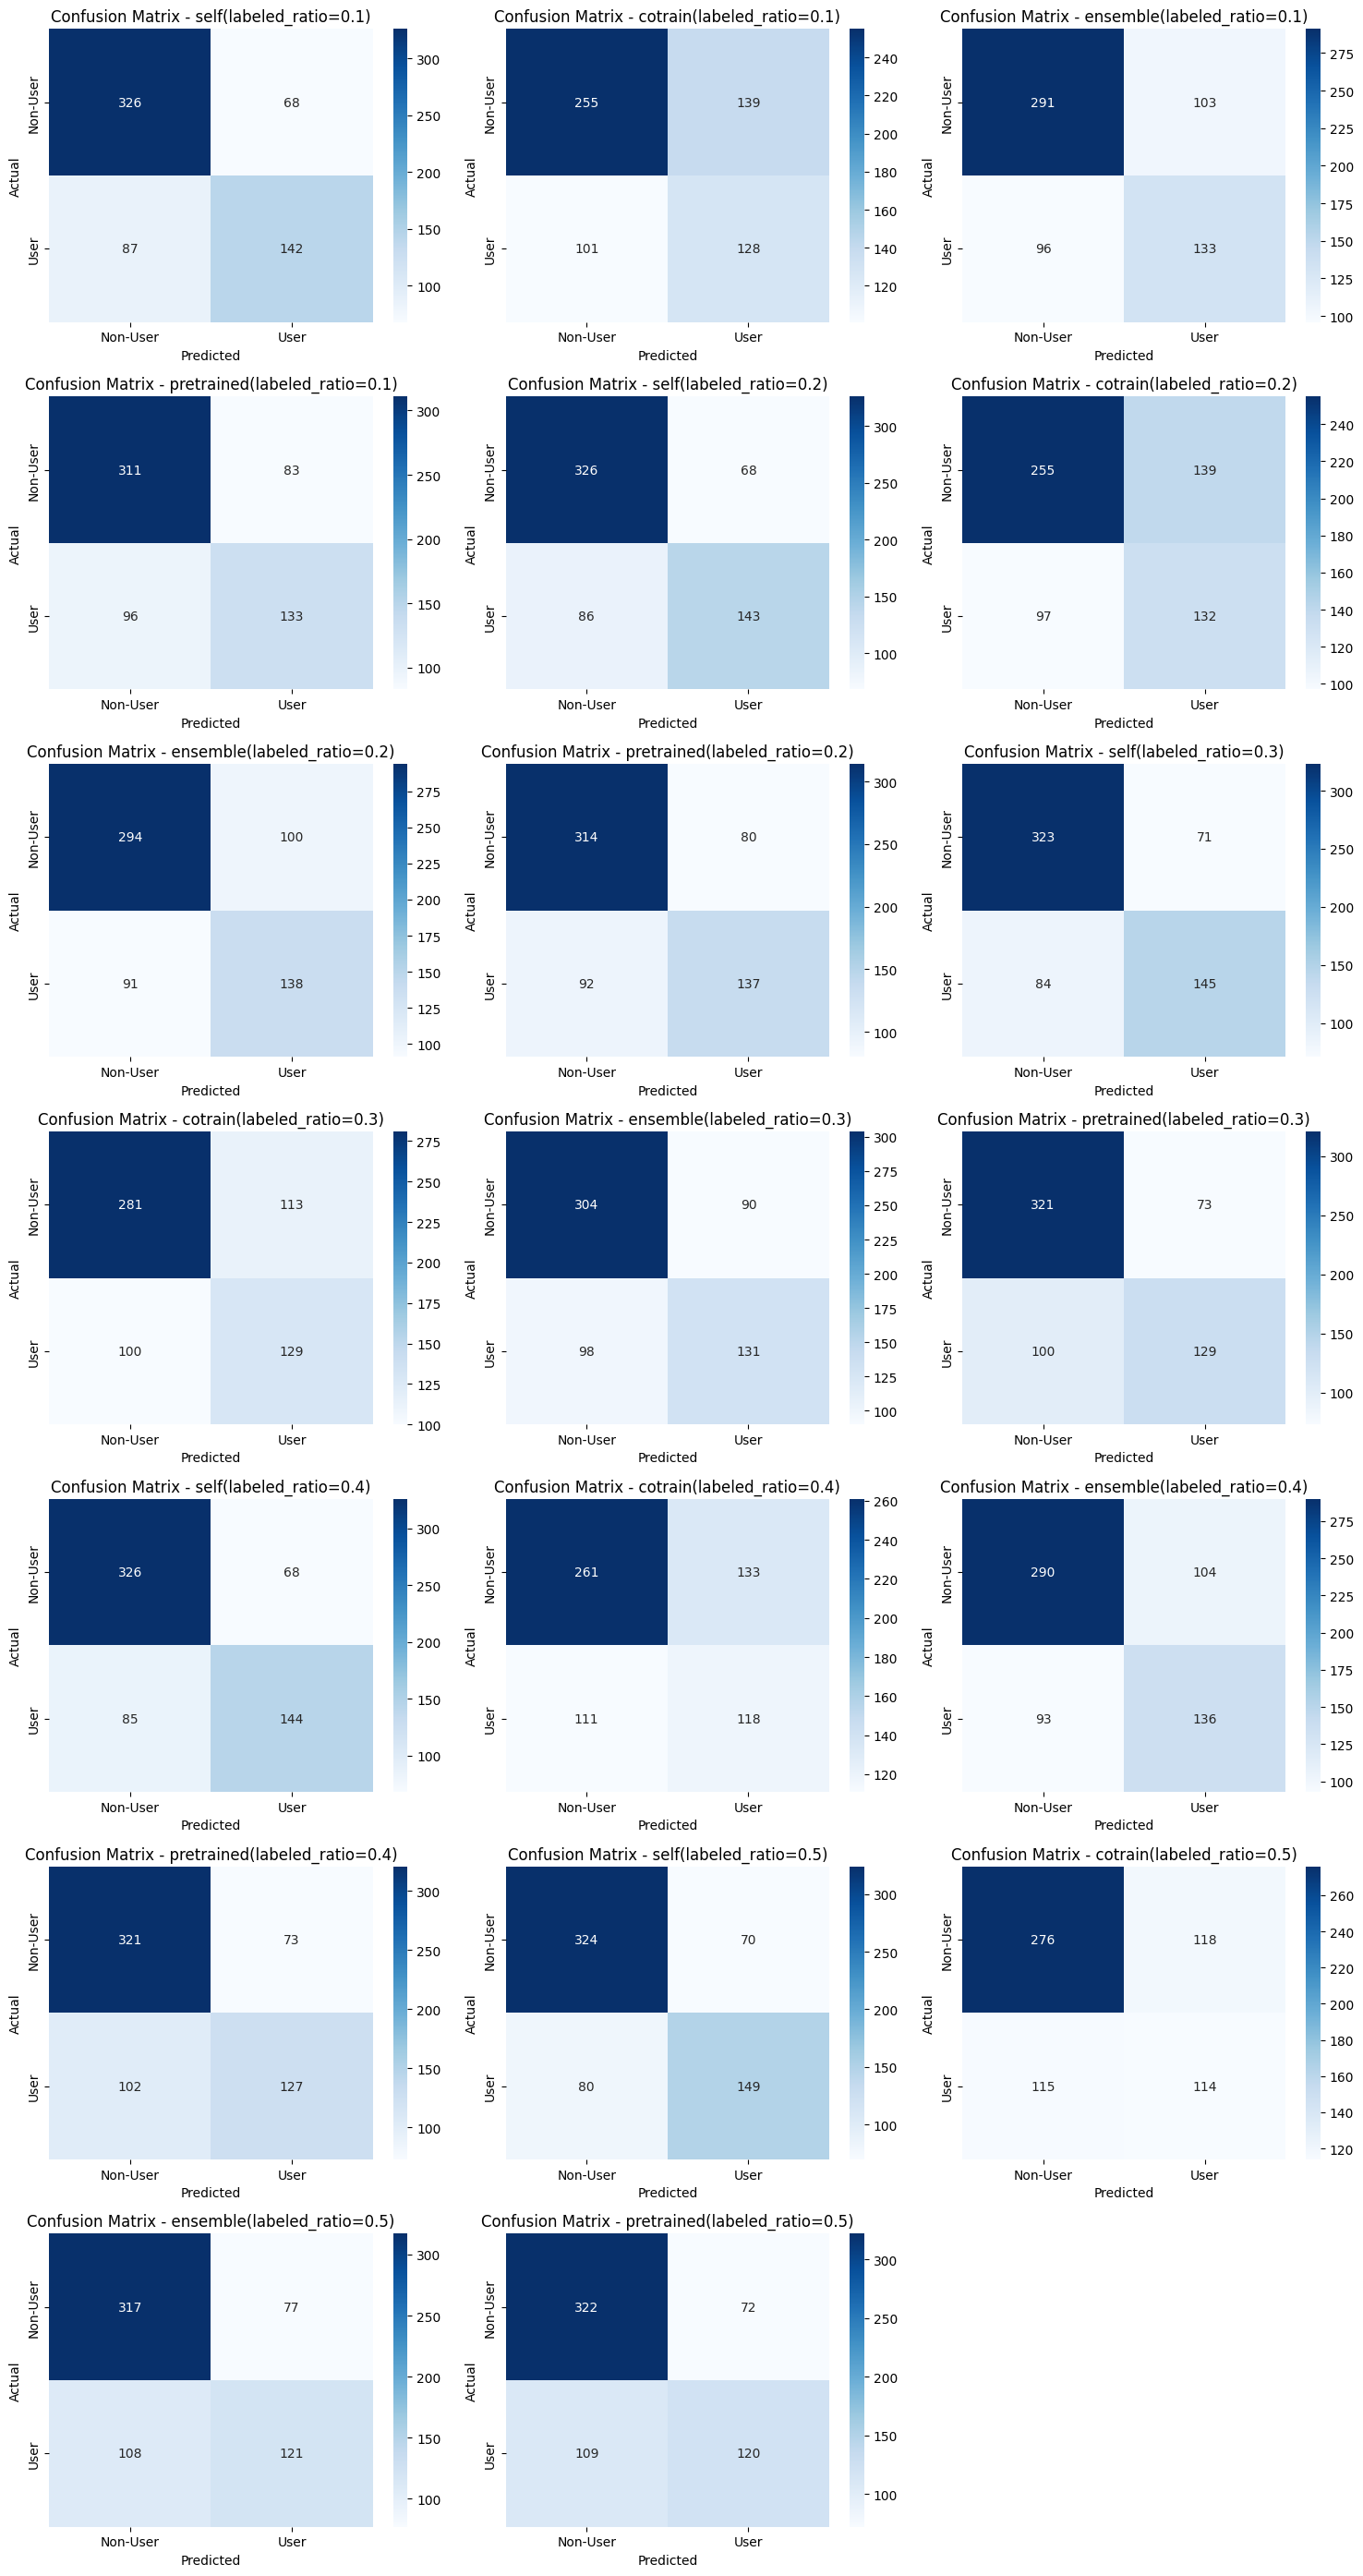

({'self(labeled_ratio=0.1)': array([[326,  68],
         [ 87, 142]]),
  'cotrain(labeled_ratio=0.1)': array([[255, 139],
         [101, 128]]),
  'ensemble(labeled_ratio=0.1)': array([[291, 103],
         [ 96, 133]]),
  'pretrained(labeled_ratio=0.1)': array([[311,  83],
         [ 96, 133]]),
  'self(labeled_ratio=0.2)': array([[326,  68],
         [ 86, 143]]),
  'cotrain(labeled_ratio=0.2)': array([[255, 139],
         [ 97, 132]]),
  'ensemble(labeled_ratio=0.2)': array([[294, 100],
         [ 91, 138]]),
  'pretrained(labeled_ratio=0.2)': array([[314,  80],
         [ 92, 137]]),
  'self(labeled_ratio=0.3)': array([[323,  71],
         [ 84, 145]]),
  'cotrain(labeled_ratio=0.3)': array([[281, 113],
         [100, 129]]),
  'ensemble(labeled_ratio=0.3)': array([[304,  90],
         [ 98, 131]]),
  'pretrained(labeled_ratio=0.3)': array([[321,  73],
         [100, 129]]),
  'self(labeled_ratio=0.4)': array([[326,  68],
         [ 85, 144]]),
  'cotrain(labeled_ratio=0.4)': array(

In [ ]:
f_out = 'figures/semi/confusion_matrices/confusion_matrices.png'
plot_confusion_matrices(cm_models, X_test, y_test, f_out=f_out, labels = ['Non-User', 'User'])

## ROC Curves

In [27]:
import joblib
baseline = joblib.load(f'models/gradient_boosting_mushroom.pt')

### ROC curves for different ratios

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


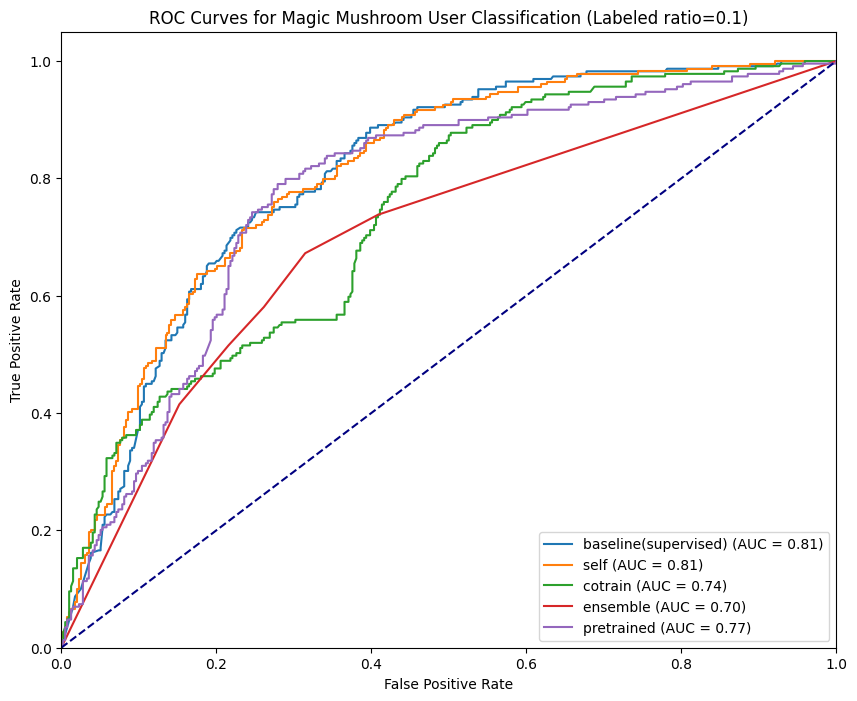

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


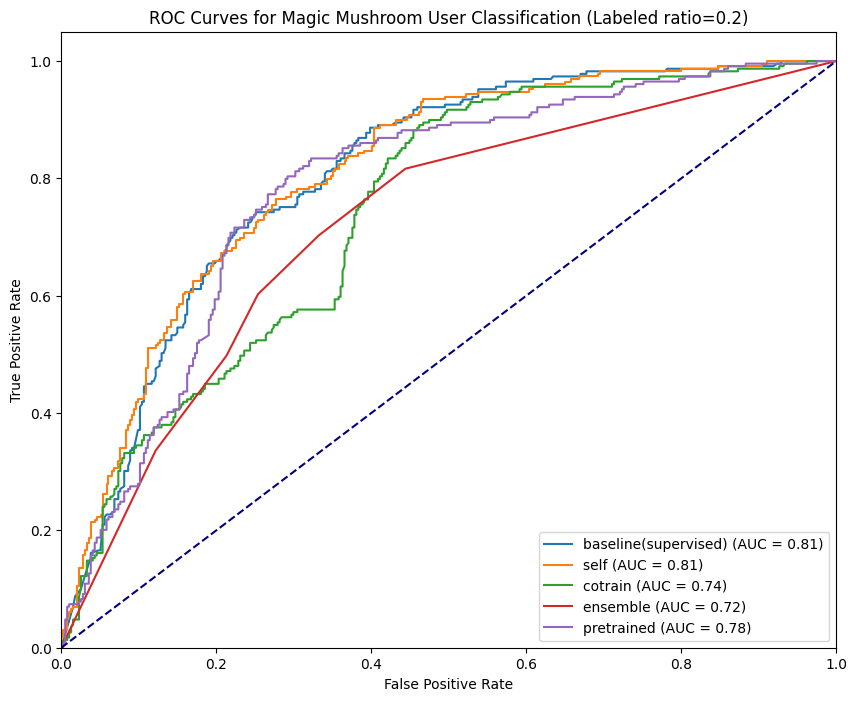

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


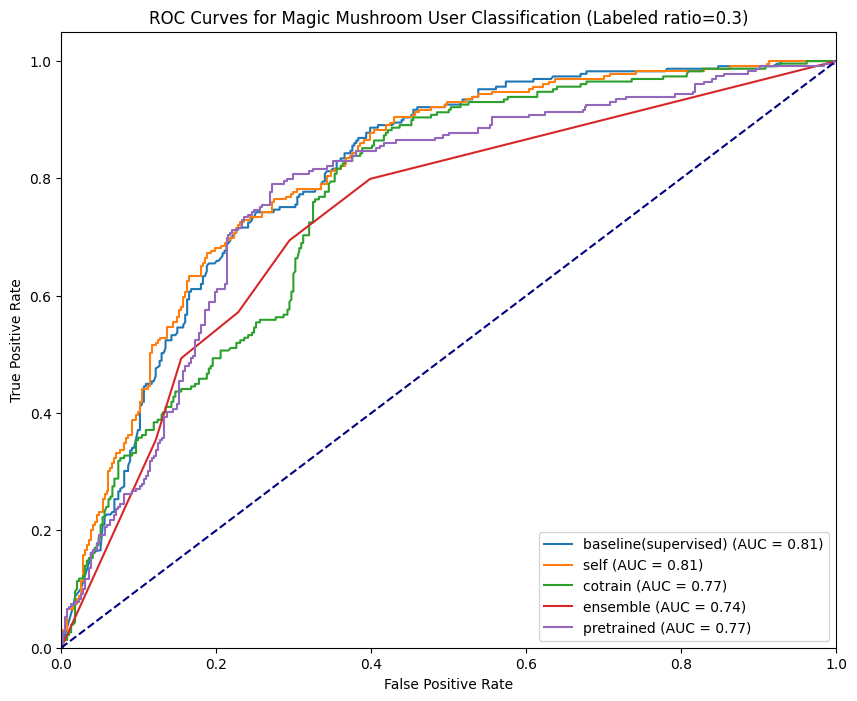

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


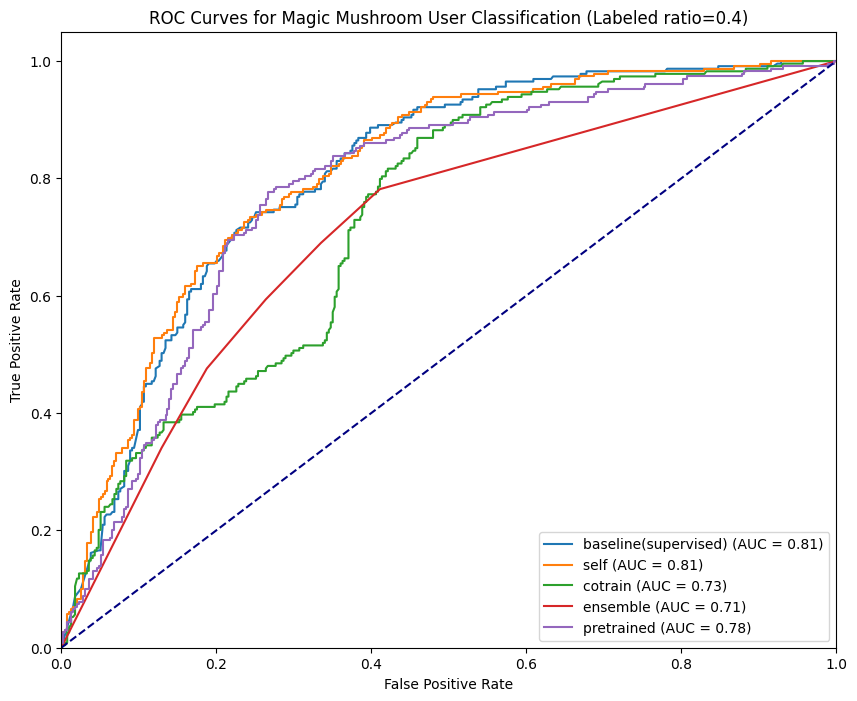

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


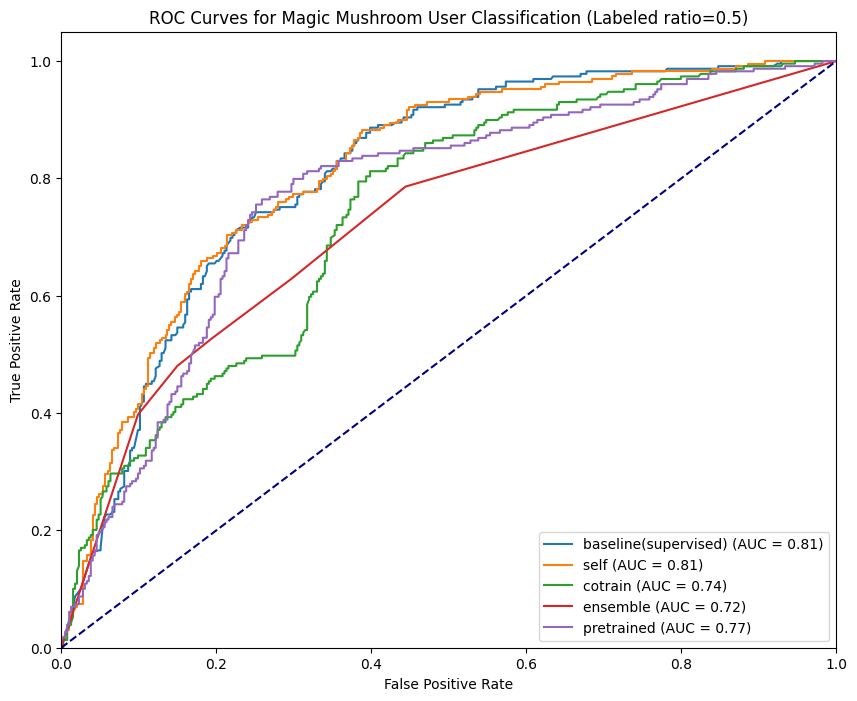

In [111]:
for ratio in models:
    roc_models = {}
    roc_models['baseline(supervised)'] = baseline
    for name, model in models[ratio].items():
        roc_models[name]=model
    plot_ROC(roc_models, X_test, y_test, title=f'ROC Curves for Magic Mushroom User Classification (Labeled ratio={ratio})', f_out=f'figures/semi/ROC/ROC_{ratio}.png')

### ROC curves for different models

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


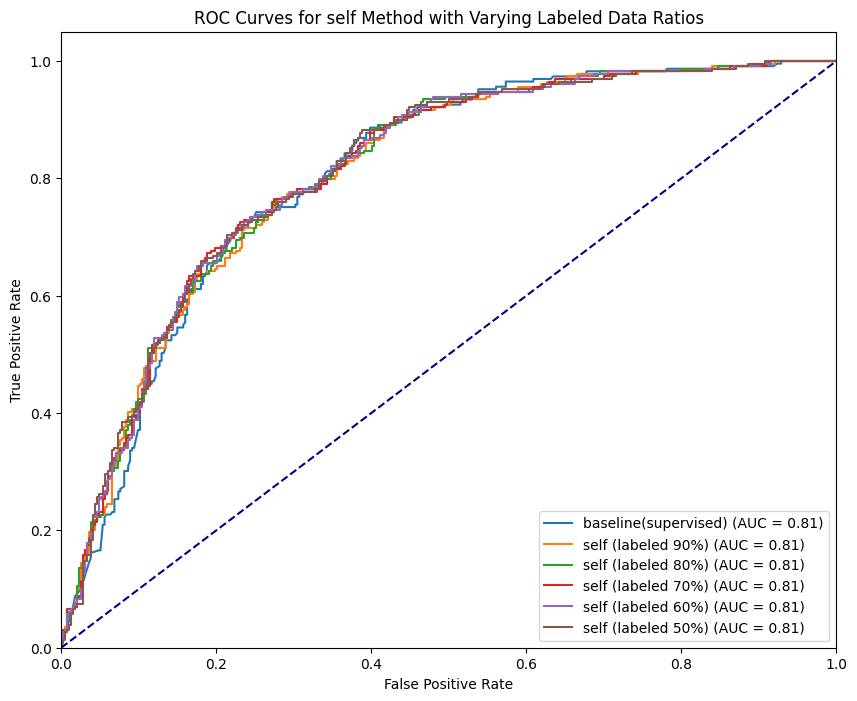

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


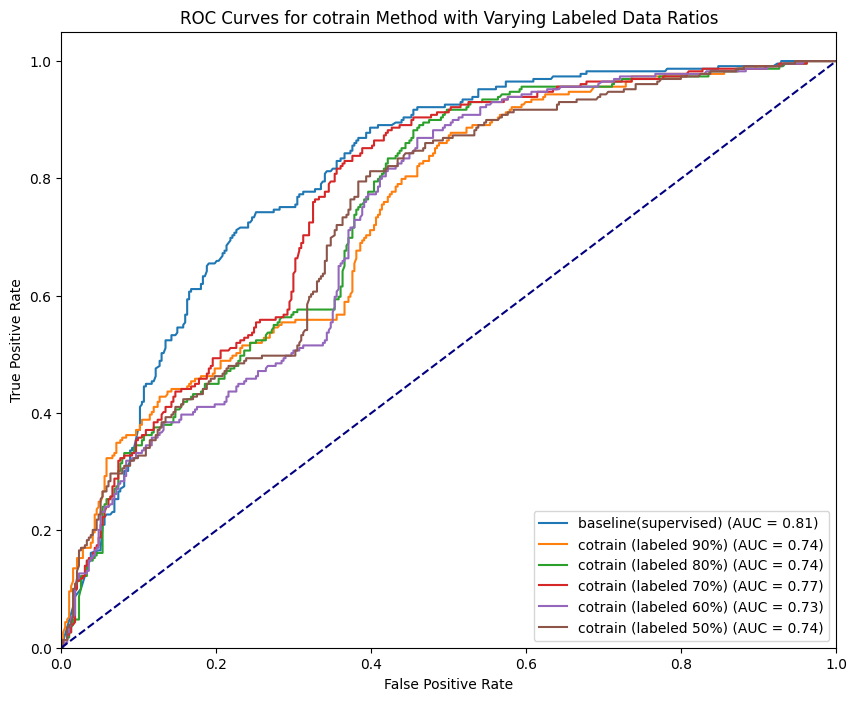

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


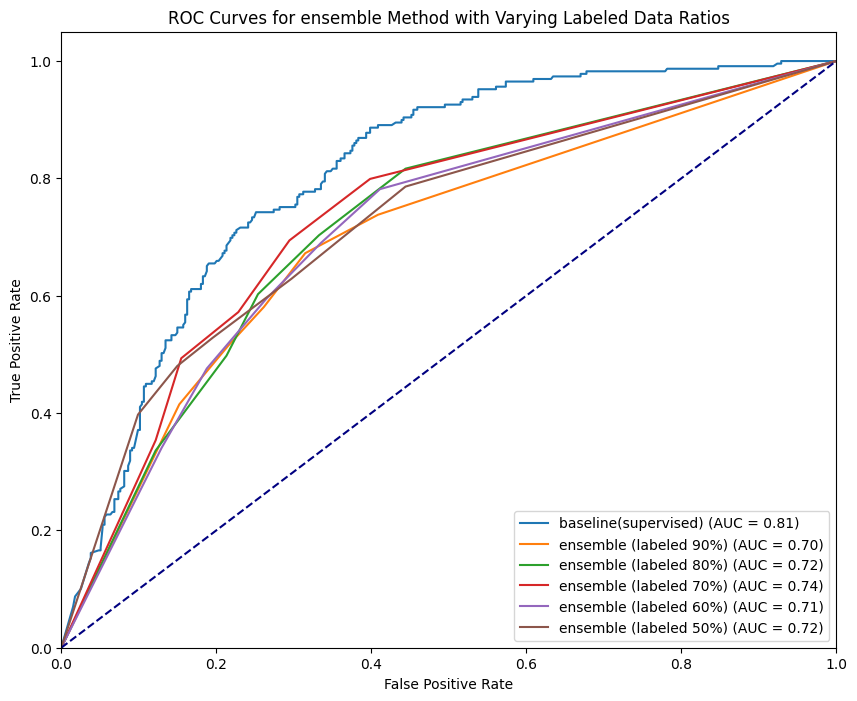

/Users/erostrate9/miniconda3/envs/d2l/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


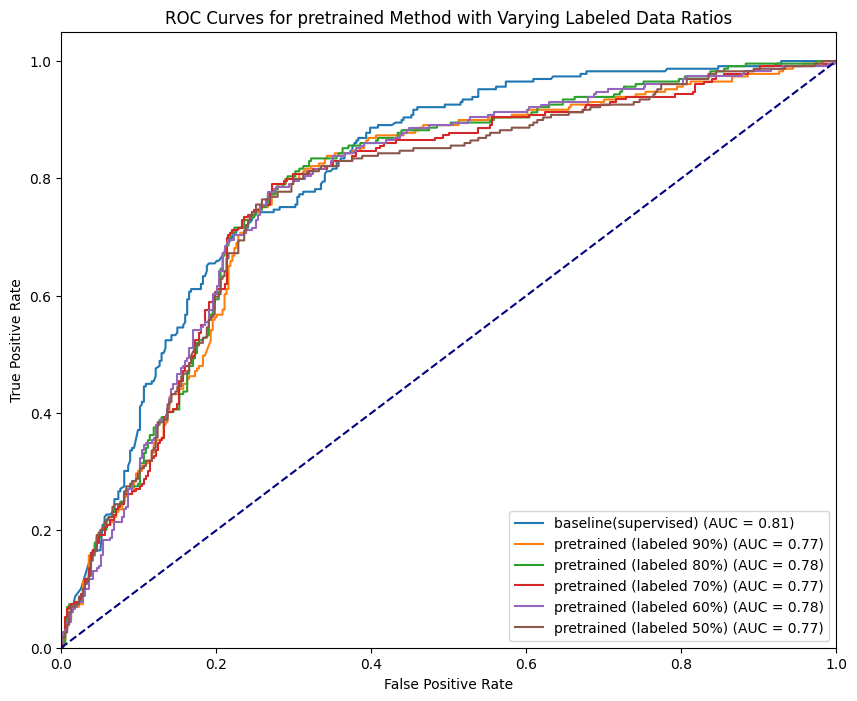

In [30]:
# Assuming 'models' is a dictionary where models[ratio][method_name] = model
# And 'baseline' is your baseline model

# List of methods
methods = ['self', 'cotrain', 'ensemble', 'pretrained']

# For each method
for method in methods:
    roc_models = {}
    roc_models['baseline(supervised)'] = baseline  # Include baseline for comparison
    # For each ratio, get the model for the current method
    for ratio in sorted(models.keys()):
        # Get the model for this method and ratio
        model = models[ratio][method]
        # Calculate the labeled ratio (since ratio is the proportion of unlabeled data)
        labeled_ratio = 1 - ratio
        # Format the labeled ratio for display
        labeled_ratio_percentage = int(labeled_ratio * 100)
        # Use the labeled ratio as part of the model name in the plot legend
        model_name = f'{method} (labeled {labeled_ratio_percentage}%)'
        roc_models[model_name] = model
    # Now plot the ROC curves for this method across different labeled ratios
    plot_ROC(
        roc_models, 
        X_test, 
        y_test, 
        title=f'ROC Curves for {method} Method with Varying Labeled Data Ratios', 
        f_out=f'figures/semi/ROC/{method}_ratios.png'
    )